ANALYSIS OF SIMULATED COSMIC MICROWAVE BACKGROUND POLARIZATION DATA 
----------------

import libraries
----------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb
import healpy as hp
import pymaster as nmt
from matplotlib.colors import *
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors
from scipy.optimize import minimize
import emcee
import corner
import scipy.stats
import seaborn as sns

Cosmological parameters initialization
---------------

In [2]:
nside = 256

lmax = 2*nside

r0 = 0.005 
omega_b0 = 0.022
H00 = 67.5
ns0 = 0.965
tau0 = 0.06
As0 = 2e-9

pars = camb.CAMBparams() 
pars.set_cosmology(H0=H00, ombh2=omega_b0, omch2=0.122, mnu=0.06, omk=0, tau=tau0)
pars.InitPower.set_params(As=As0, ns=ns0, r=r0)
pars.set_for_lmax(lmax, lens_potential_accuracy=1);
pars.WantTensors = True
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK', lmax=lmax)

Plots of ($C_\ell^{TT}$, $C_\ell^{EE}$, $C_\ell^{BB}$, $C_\ell^{TE}$) with key 'total' : all contributions are used (tensor, lens_potential etc...) and comparaison with other key.  
---------------------

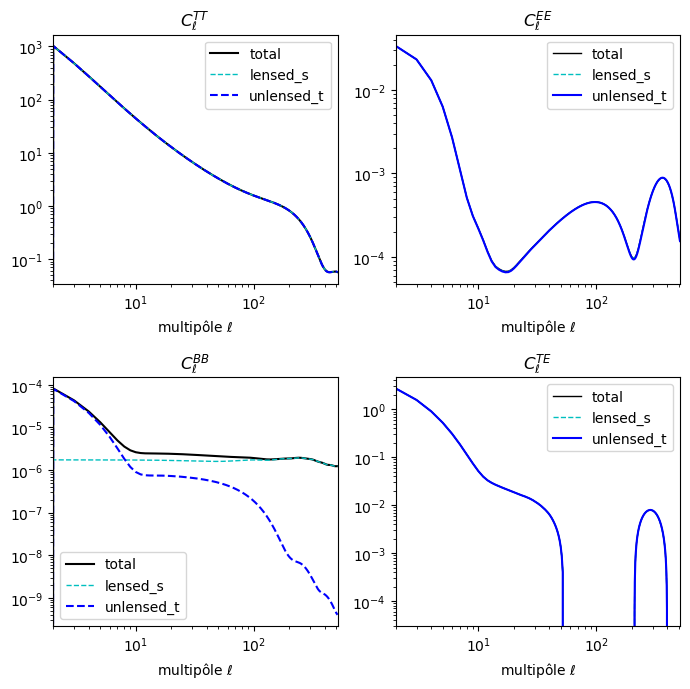

In [3]:
totCL = powers['total']
lensedCL=powers['lensed_scalar']
unlensedtot = powers['unlensed_total']
TensorCl = powers['tensor']


ls = np.arange(totCL.shape[0])
u = (ls*(ls+1))/(2*np.pi)
u[0] = 1

# TT Field
clTT = totCL[:, 0] / u 
clTTlensed_scalar =  lensedCL[:, 0] / u
clTTunlensedtot = unlensedtot[:,0] / u 
plt.figure(figsize=(7,7))
plt.subplot(2, 2, 1)
plt.loglog(ls, clTT, color='black', label = 'total',linewidth = 1.5)
plt.loglog(ls, clTTlensed_scalar, '--', color='c', label = 'lensed_s', linewidth = 1)
plt.loglog(ls, clTTunlensedtot, '--', color = 'b', label = 'unlensed_t', linewidth = 1.5)
plt.title(r'$C_\ell^{TT}$')
plt.legend()
plt.xlabel(r'multipôle $\ell$')
plt.xlim([2,lmax])

# EE Field
clEE = totCL[:, 1] / u 
clEElensedCL = lensedCL[:, 1] / u  
clEEunlensedtot = unlensedtot[:,1] / u
plt.subplot(2, 2, 2)
plt.loglog(ls, clEE, color='black', label = 'total',linewidth = 1)
plt.loglog(ls, clEElensedCL, '--', color='c', label = 'lensed_s',linewidth = 1)
plt.loglog(ls, clEEunlensedtot, '-', color = 'b', label = 'unlensed_t', linewidth = 1.5)
plt.title(r'$C_\ell^{EE}$')
plt.xlabel(r'multipôle $\ell$')
plt.legend()

plt.xlim([2,lmax])

# BB Field
clBB = totCL[:, 2] / u 
clBBlensedCL = lensedCL[:, 2] / u 
clBBunlensedtot = unlensedtot[:,2] /u 
clBBClTensor = TensorCl[:,2]
plt.subplot(2, 2, 3)
plt.loglog(ls, clBB, color='black',  label = 'total',linewidth = 1.5)
plt.loglog(ls, clBBlensedCL, '--', color='c',  label = 'lensed_s',linewidth = 1)
plt.loglog(ls, clBBunlensedtot, '--', color = 'b', label = 'unlensed_t', linewidth = 1.5)
plt.title(r'$C_\ell^{BB}$')
plt.xlabel(r'multipôle $\ell$')
plt.legend()
plt.legend(loc = 'lower left')
plt.xlim([2,lmax])


# TE Field
clTE = totCL[:, 3] / u 
clTElensedCL = lensedCL[:, 3] / u 
clTEunlensedtot = unlensedtot[:,3] / u
plt.subplot(2, 2, 4)
plt.loglog(ls, clTE, color='black', label = 'total',linewidth = 1)
plt.loglog(ls, clTElensedCL, '--', color='c', label = 'lensed_s', linewidth = 1)
plt.loglog(ls, clTEunlensedtot, '-', color = 'b', label = 'unlensed_t', linewidth = 1.5)
plt.title(r'$C_\ell^{TE}$')
plt.xlabel(r'multipôle $\ell$')
plt.legend()
plt.xlim([2,lmax])

plt.tight_layout()
#plt.savefig('AAspectre_unlensed_t.pdf', dpi = 1000)
plt.show()

Error on lensed and unlensed spectra with TT and EE 
--------------

/var/folders/67/lyswhmnn6d55d866pqdzcs_m0000gn/T/ipykernel_78720/1847729.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(ls, 100*(clEE / clEEunlensedtot - 1), color = 'blue', label = '( $C_{\ell}^{EE}$ / $C_{\ell}^{EE-unlensed}$ ) -1 ', linewidth = 3)
/var/folders/67/lyswhmnn6d55d866pqdzcs_m0000gn/T/ipykernel_78720/1847729.py:3: RuntimeWarning: invalid value encountered in divide
  plt.plot(ls, 100*(clTT / clTTunlensedtot -1 ), color = 'c', label = '( $C_{\ell}^{TT}$ / $C_{\ell}^{TT-unlensed}$ ) -1 ', linewidth = 3)


<function matplotlib.pyplot.show(close=None, block=None)>

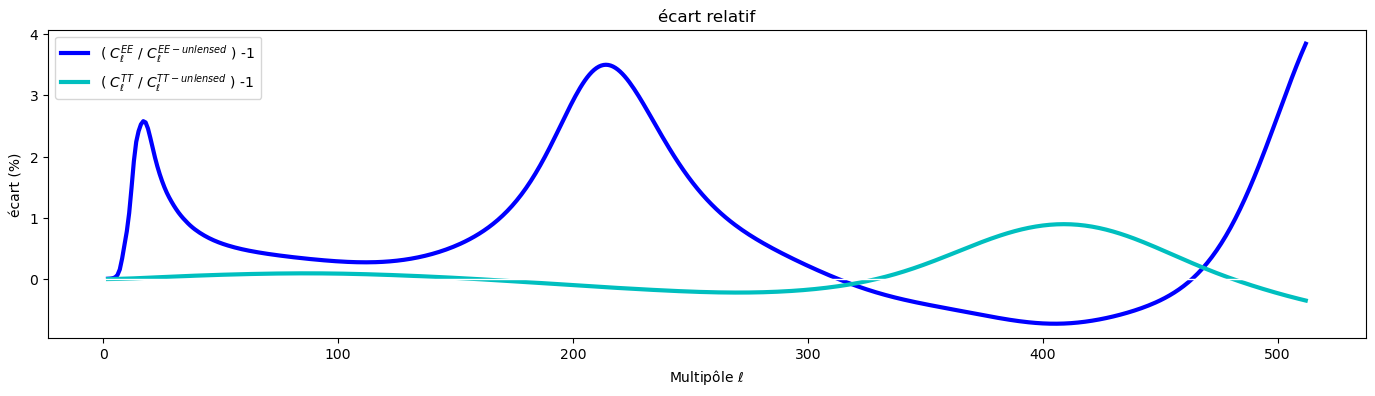

In [4]:
plt.figure(figsize = (17,4))
plt.plot(ls, 100*(clEE / clEEunlensedtot - 1), color = 'blue', label = '( $C_{\ell}^{EE}$ / $C_{\ell}^{EE-unlensed}$ ) -1 ', linewidth = 3)
plt.plot(ls, 100*(clTT / clTTunlensedtot -1 ), color = 'c', label = '( $C_{\ell}^{TT}$ / $C_{\ell}^{TT-unlensed}$ ) -1 ', linewidth = 3)
plt.axhline(y = 0, color = 'white', linewidth = 1)
plt.xlabel('Multipôle $\ell$')
plt.ylabel('écart (%)')
plt.title('écart relatif')
plt.legend()
#plt.savefig('AAecart_cl.pdf', dpi = 1000)
plt.show


Plots of ($C_\ell^{TT}$, $C_\ell^{EE}$, $C_\ell^{BB}$, $C_\ell^{TE}$) with key 'total' : all contributions are used (tensor, lens_potential etc...) and study of some cosmological dependencies
----------------------

With Baryons : 

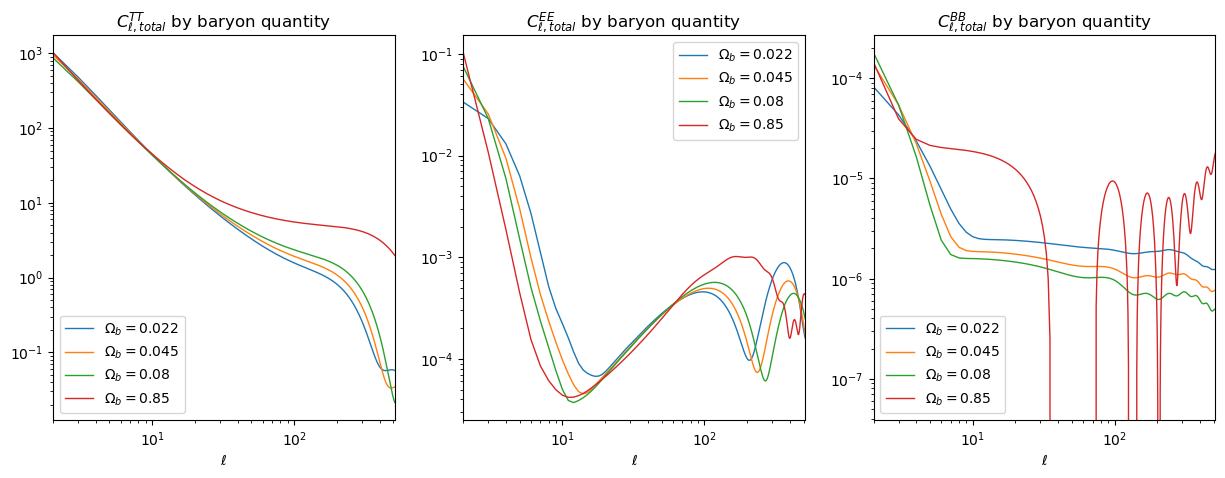

In [5]:
omega_bar = [0.022, 0.045, 0.08,0.85]

# Initialiser la figure en dehors de la boucle
plt.figure(figsize=(15, 5))

for i in omega_bar:
    pars = camb.CAMBparams() 
    pars.set_cosmology(H0=H00, ombh2=i, omch2=0.122, mnu=0.06, omk=0, tau=tau0)
    pars.InitPower.set_params(As=As0, ns=ns0, r=r0)
    pars.set_for_lmax(lmax, lens_potential_accuracy=1);
    pars.WantTensors = True
    results = camb.get_results(pars)
    powersBar = results.get_cmb_power_spectra(pars, CMB_unit='muK', lmax=lmax)
    totCLBar = powersBar['total']
    ls = np.arange(totCLBar.shape[0])
    u = (ls*(ls+1))/(2*np.pi)
    u[0] = 1
    
    # TT Field
    clTTbar = totCLBar[:, 0] / u 
    plt.subplot(1, 3, 1)
    plt.loglog(ls, clTTbar, linewidth=1, label=f"$\Omega_b = {i}$")
    plt.title('$C_{\ell, total}^{TT}$ by baryon quantity ')
    plt.xlabel(r'$\ell$')
    plt.xlim([2, lmax])
    plt.legend()
    plt.legend(["$\Omega_{b} = %s$" % i for i in omega_bar], loc = 'lower left')
    
    # EE Field
    clEEbar = totCLBar[:, 1] / u 
    plt.subplot(1, 3, 2)
    plt.loglog(ls, clEEbar, linewidth=1, label=f"$\Omega_b = {i}$")
    plt.title('$C_{\ell, total}^{EE}$ by baryon quantity ')
    plt.xlabel(r'$\ell$')
    plt.xlim([2, lmax])
    plt.legend()
    plt.legend(["$\Omega_{b} = %s$" % i for i in omega_bar], loc = 'upper right')
    
    # BB Field
    clBBbar = totCLBar[:, 2] / u
    plt.subplot(1, 3, 3)
    plt.loglog(ls, clBBbar, linewidth=1, label=f"$\Omega_b = {i}$")
    plt.title('$C_{\ell, total}^{BB}$ by baryon quantity ')
    plt.xlabel(r'$\ell$')
    plt.xlim([2, lmax])
    plt.legend()
    plt.legend(["$\Omega_{b} = %s$" % i for i in omega_bar], loc = 'lower left')

 #plt.savefig('baryon.pdf', dpi =1000)
plt.show()


With optical depth : 

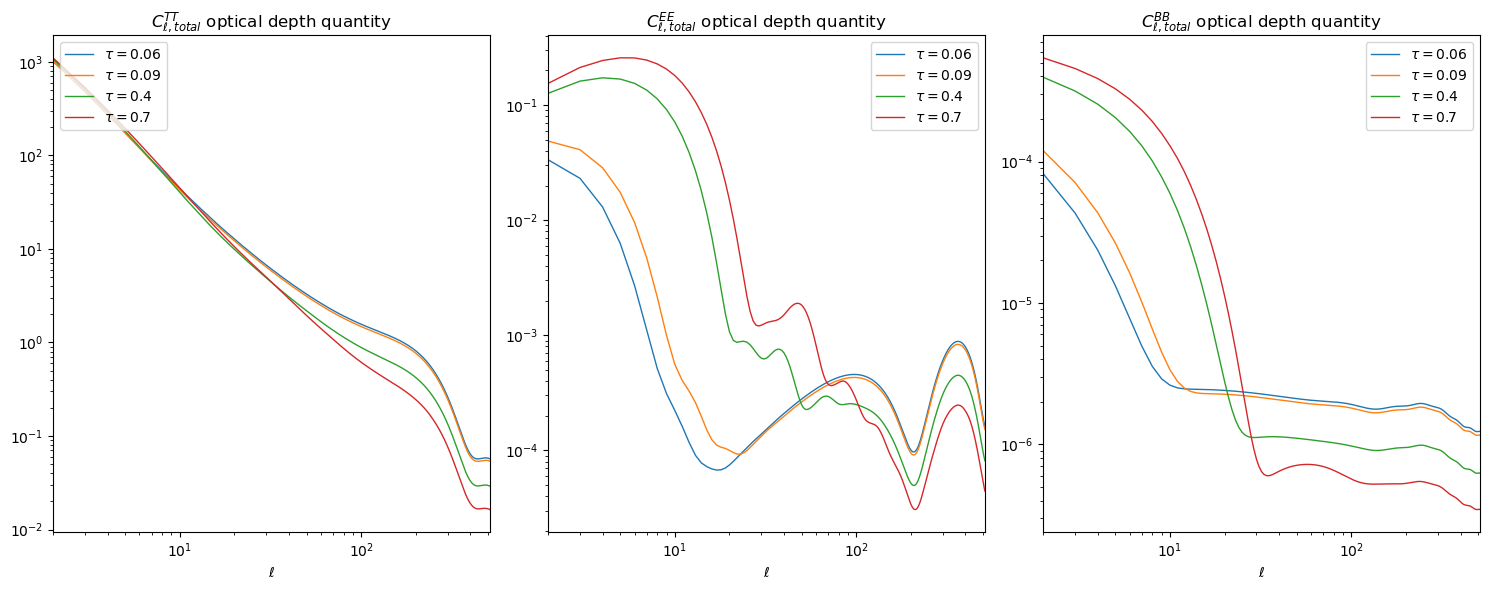

In [6]:
tau_values = [0.06, 0.09, 0.4, 0.7]

plt.figure(figsize=(15, 6))

for i in tau_values:
    pars = camb.CAMBparams() 
    pars.set_cosmology(H0=H00, ombh2=omega_b0, omch2=0.122, mnu=0.06, omk=0, tau=i)
    pars.InitPower.set_params(As=As0, ns=ns0, r=r0)
    pars.set_for_lmax(lmax, lens_potential_accuracy=1);
    pars.WantTensors = True
    results = camb.get_results(pars)
    powersTau = results.get_cmb_power_spectra(pars, CMB_unit='muK', lmax=lmax)
    totCLTau = powersTau['total']
    ls = np.arange(totCLTau.shape[0])
    u = (ls*(ls+1))/(2*np.pi)
    u[0] = 1
    
    # TT Field
    clTTtau = totCLTau[:, 0] / u 
    plt.subplot(1, 3, 1)
    plt.loglog(ls, clTTtau, label=f"$\\tau = {i}$", linewidth=1)
    plt.title('$C_{\ell, total}^{TT}$ optical depth quantity ')
    plt.xlabel(r'$\ell$')
    plt.xlim([2, lmax])
    plt.legend(loc='upper left')
    
    # EE Field
    clEEtau = totCLTau[:, 1] / u 
    plt.subplot(1, 3, 2)
    plt.loglog(ls, clEEtau, label=f"$\\tau = {i}$", linewidth=1)
    plt.title('$C_{\ell, total}^{EE}$ optical depth quantity ')
    plt.xlabel(r'$\ell$')
    plt.xlim([2, lmax])
    plt.legend(loc='upper right')
    
    # BB Field
    clBBtau = totCLTau[:, 2] / u
    plt.subplot(1, 3, 3)
    plt.loglog(ls, clBBtau, label=f"$\\tau = {i}$", linewidth=1)
    plt.title('$C_{\ell, total}^{BB}$ optical depth quantity ')
    plt.xlabel(r'$\ell$')
    plt.xlim([2, lmax])
    plt.legend(loc='upper right')

plt.tight_layout()
#plt.savefig('Atau.pdf', dpi =1000)
plt.show()


With tensor-to-scalar ratio : 

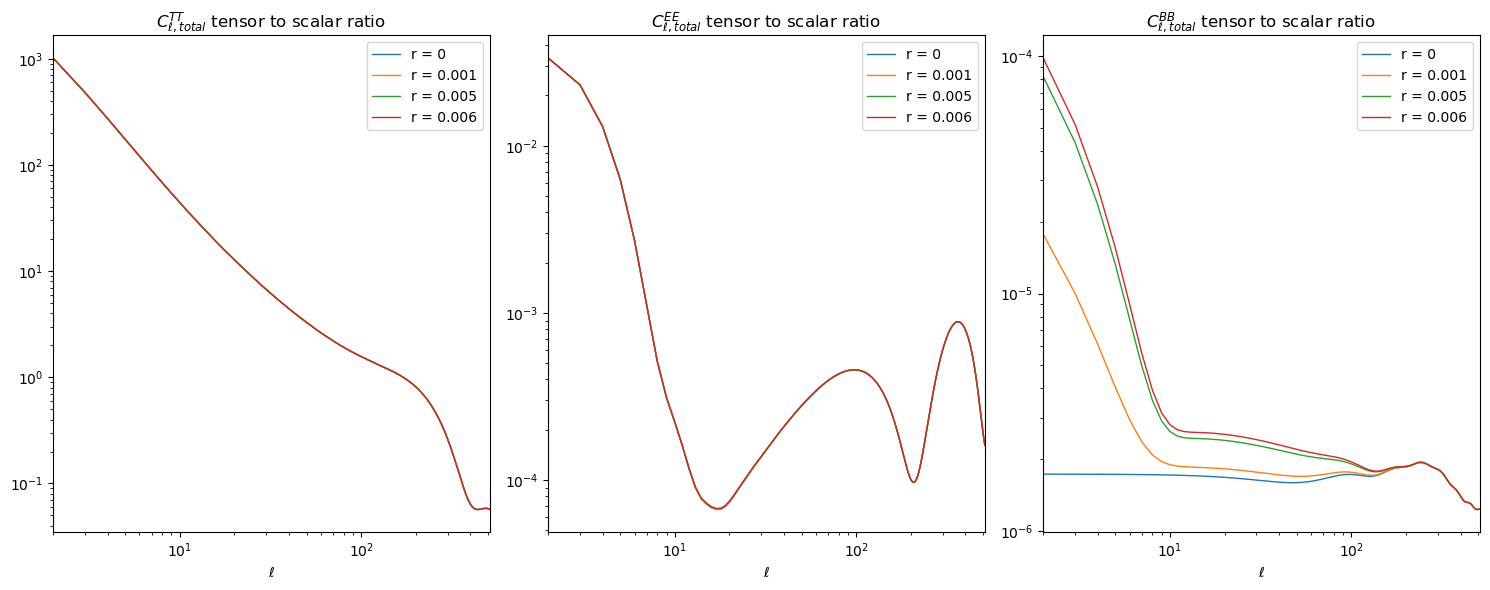

In [7]:
rr = [0, 0.001, 0.005, 0.006]

plt.figure(figsize=(15, 6))

for r_val in rr:
    pars = camb.CAMBparams() 
    pars.set_cosmology(H0=H00, ombh2=omega_b0, omch2=0.122, mnu=0.06, omk=0, tau=tau0)
    pars.InitPower.set_params(As=As0, ns=ns0, r=r_val)
    pars.set_for_lmax(lmax, lens_potential_accuracy=1)
    pars.WantTensors = True
    results = camb.get_results(pars)
    powersrr = results.get_cmb_power_spectra(pars, CMB_unit='muK', lmax=lmax)
    totCLrr = powersrr['total']
    ls = np.arange(totCLrr.shape[0])
    u = (ls*(ls+1))/(2*np.pi)
    u[0] = 1

    # TT Field
    clTTrr = totCLrr[:, 0] / u 
    plt.subplot(1, 3, 1)
    plt.loglog(ls, clTTrr, label=f'r = {r_val}', linewidth=1)
    plt.title('$C_{\ell, total}^{TT}$ tensor to scalar ratio ')
    plt.xlim([2, lmax])
    plt.xlabel(r'$\ell$')
    plt.legend()

    # EE Field
    clEErr = totCLrr[:, 1] / u
    plt.subplot(1, 3, 2)
    plt.loglog(ls, clEErr, label=f'r = {r_val}', linewidth=1)
    plt.title('$C_{\ell, total}^{EE}$ tensor to scalar ratio ')
    plt.xlim([2, lmax])
    plt.xlabel(r'$\ell$')
    plt.legend()

    # BB Field
    clBBrr = totCLrr[:, 2] / u 
    plt.subplot(1, 3, 3)
    plt.loglog(ls, clBBrr, label=f'r = {r_val}', linewidth=1)
    plt.title('$C_{\ell, total}^{BB}$ tensor to scalar ratio ')
    plt.xlim([2, lmax])
    plt.xlabel(r'$\ell$')
    plt.legend()

plt.tight_layout()
#plt.savefig('r_.pdf', dpi = 1000)
plt.show()


Plot of $C^{BB}_{\ell, lensing}$ which will be useful in the rest of the code 
----------------------------------------------------------------------------

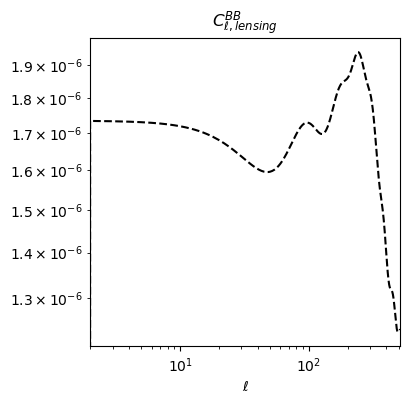

In [8]:
plt.figure(figsize = (4,4))

Alens0 = 1

def lensing_spectrum(Alens):
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H00, ombh2=omega_b0, omch2=0.122, mnu=0.06, omk=0, tau=tau0)
    pars.InitPower.set_params(As=As0, ns=ns0, r=r0)
    pars.set_for_lmax(lmax, lens_potential_accuracy=1)
    pars.WantTensors = True
    pars.Alens = Alens

    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK', lmax = lmax)
    totCL = powers['total']
    ls = np.arange(totCL.shape[0])
    u = (ls*(ls+1))/(2*np.pi)
    u[0] = 1

    clLensed = powers['lensed_scalar'][:, 2]/u 

    return clLensed

clLens = lensing_spectrum(Alens0)
plt.xlim([2,lmax])
plt.title('$C^{BB}_{\ell, lensing}$')
plt.xlabel('$\ell$')
plt.loglog(ls, clLens,'--', color =  'black')

We can generate the maps (T,Q,U) using synfast from the Healpy library : 
--------------------

In [9]:
noise_level = 1e-10

n_pix = hp.nside2npix(nside) 
noise = np.random.normal(loc=0, scale=noise_level, size=n_pix)

maps = hp.synfast((clTT, clEE, clBB, clTE),
                  nside, new=True)              # order is  (TT, EE, BB, TE) 
map_noise = hp.synfast(noise, nside)

maps_with_noise = maps + map_noise   

Plot of maps with noise : 
---------------------

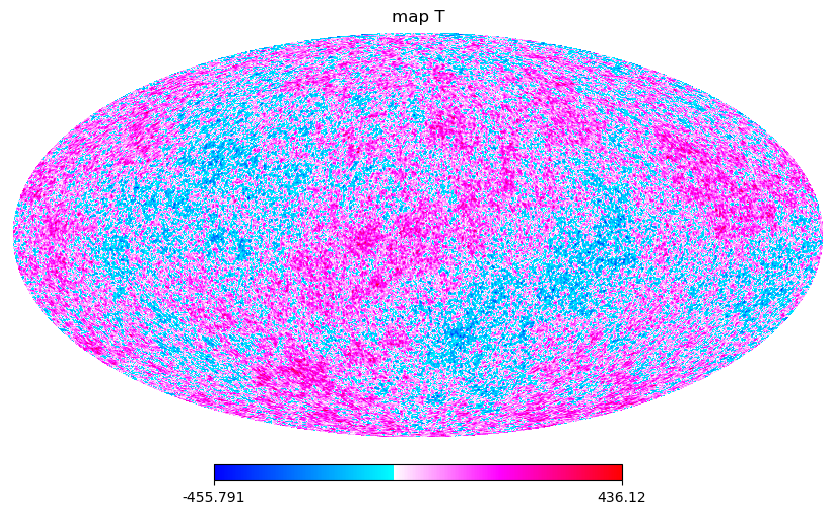

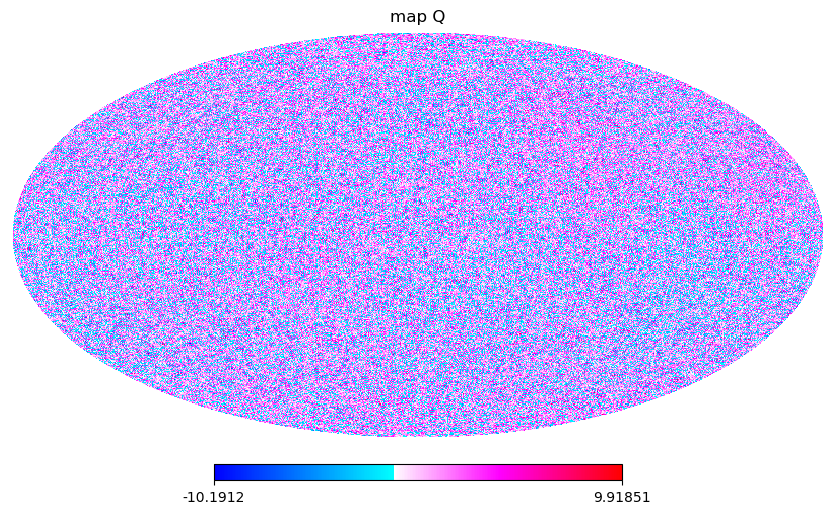

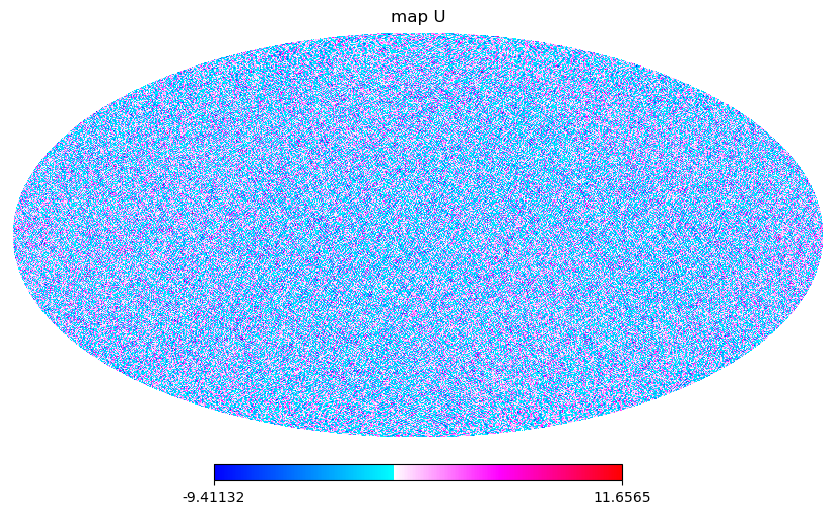

In [10]:
def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)
c = mcolors.ColorConverter().to_rgb
rvb = make_colormap(
    [c('blue'), c('cyan'),0.44, c('white'), c('magenta'),0.7,c('magenta'),c('red'),c('red'),c('red')])



hp.mollview(maps_with_noise[0], title='map T',cmap = rvb)

hp.mollview(maps_with_noise[1], title='map Q',cmap = rvb)

hp.mollview(maps_with_noise[2], title='map U',cmap = rvb)

And so we can get the data simulated from maps with Healpy's anafast, here called 'cl_reconstruit' : 
----------------------

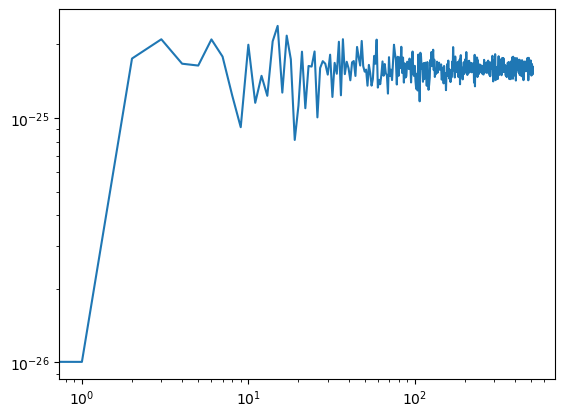

In [11]:
cl_reconstruit = hp.anafast(maps_with_noise, lmax=lmax)

Nl =  hp.anafast(noise, lmax = lmax)

plt.loglog(ls, Nl)

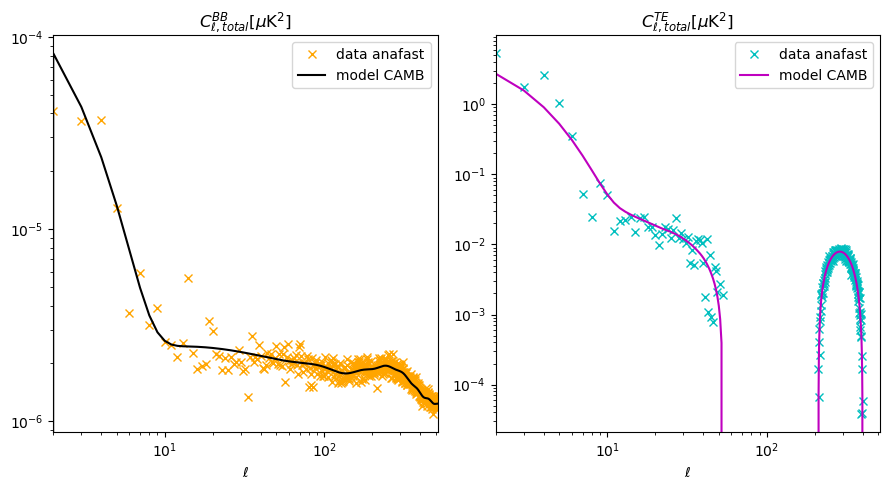

In [12]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(9, 5))

plt.subplot(1, 2, 1)
clReconstruitBB = cl_reconstruit[2]
plt.loglog(ls, clReconstruitBB,'x', color='orange', label='data anafast')
plt.loglog(ls, clBB  , label='model CAMB', color='black')
plt.xlim([2, lmax])
plt.title(r'$C_{\ell, total}^{BB} [\mu{\rm K}^2]$')
plt.legend()
plt.xlabel('$\ell$')
plt.tight_layout()


plt.subplot(1, 2, 2)
plt.loglog(ls, cl_reconstruit[3]  ,'x', color='c', label='data anafast')
plt.loglog(ls, clTE   , label='model CAMB', color='m')
plt.xlim([2, lmax])
plt.title(r'$C_{\ell, total}^{TE}  [\mu{\rm K}^2]$')
plt.xlabel('$\ell$')
plt.legend()

plt.tight_layout()

#plt.savefig('AAAAAAclData.pdf', dpi = 1000)
plt.show()

Plot of $C^{BB}_{\ell, Tensor}$ which will be useful in the rest of the code (for the likelihood)
----------------------------------------------------------------------------

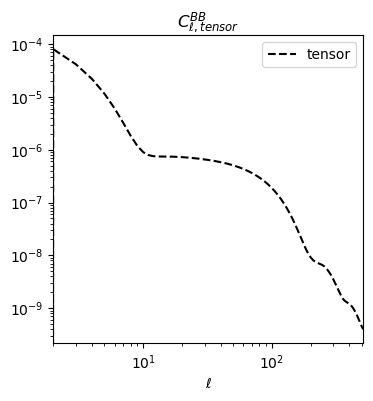

In [13]:
clTensor = powers['tensor'][:,2] / u 
plt.figure(figsize=(4, 4))
plt.loglog(ls, clTensor,'--', color='black', label='tensor')
plt.xlim([2,lmax])
plt.title('$C_{\ell, tensor}^{BB}$')
plt.xlabel(r'$\ell$')
plt.legend()
plt.show()

Part I : Full sky estimation (fsky = 1)
----------------------------------------
---------------------------------------------
---------------------------------------------

Estimation of r by gaussian Log-Likelihood minimization
---------------------------------------------------------

(for the  $C_{l}^{BB}$) : 

$$-2 \log(L) \approx \sum_{l} (2l+1)[C_{l}^{-1} D_{l} + ln(C_{l})] \approx \chi^{2}$$

$$ L \approx \exp\Big(-\left(\chi^{2} - \min(\chi^{2})\right)^{2}\Big) $$

Where $C_{l}$ is the theoretical spectrum (the model) and where $D_{l}$ is the reconstructed spectrum with white noise. 

For the covariance, we can write : 

$$C_{l}(r) = \frac{1}{r_{0}} r  C_{l, tensor}^{BB}(r = r_{0}) + C_{l,lensing}^{BB} + N_{l}$$

In [14]:
def likelihood(r):
    clTh =  clTensor * r / r0 + Nl + clLens 
    somme = np.sum((2*ls[2:]+1)*((clReconstruitBB[2:]/clTh[2:])+ np.log(clTh[2:])))
    return somme

res = minimize(likelihood, x0=r0, method='Nelder-Mead')
optimal_rBruit = res.x[0]
print("The estimation of r is :", optimal_rBruit)

The estimation of r is : 0.0047617187499999995


In [15]:
import autograd.numpy as np
from autograd import hessian

# Calcul de la matrice hessienne
hess_fn = hessian(likelihood)
hess = hess_fn(r0)

sig = 1/np.sqrt(hess)
print(sig)

0.00023210712472150827


In [16]:

def fisher(r0, Alens):
    clBB0 = r0 * clTensor / r0  + Nl + Alens * clLens / Alens0 
    fisher_sum = (0.5/r0**2) * np.sum((2 * ls[2:] + 1) * ( clTensor[2:] /   clBB0[2:])**2)
    return fisher_sum

F = fisher(r0, Alens = 1) 

sigma = 1/np.sqrt(F)
print(sigma)

0.00032271549022497645


Likelihood plot :  
---------------------

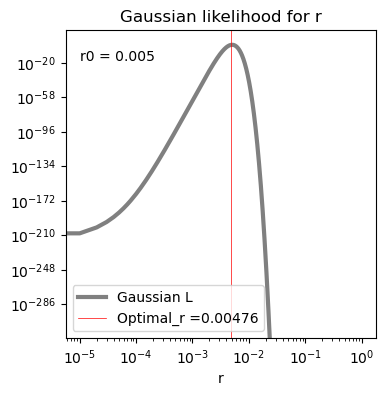

In [17]:
r = np.linspace(0, 1, 100000)
num_likelihoods = 1
Alens = np.linspace(0, 2, 100000)


SOLgauss = []
for _ in range(num_likelihoods):
    maps = hp.synfast((clTT, clEE, clBB, clTE),
                  nside, new=True) # l'ordre est (TT, EE, BB, TE) 
    maps_with_noise = maps   
    cl_reconstruit = hp.anafast(maps_with_noise, lmax=lmax)
    clReconstruitBB = cl_reconstruit[2]
    for j in r:
        clTh = clTensor * j / r0 + Nl + clLens 
        somme =  np.sum((2*ls[2:]+1)*((clReconstruitBB[2:]/clTh[2:])+ np.log(clTh[2:])))
        SOLgauss.append(somme)
SOLgauss = np.array(SOLgauss)
fGauss = SOLgauss - np.min(SOLgauss)

plt.figure(figsize=(4,4))
plt.loglog(r, np.exp(-fGauss/2), 'grey',linewidth=3, label = 'Gaussian L')
plt.xlabel('r')
plt.title('Gaussian likelihood for r')
plt.text(1e-5, 1e-18, 'r0 = 0.005', color = 'black', fontsize = 10)
plt.axvline(x=optimal_rBruit,color='red', linewidth=0.5, label = 'Optimal_r ='+str("%.5f" %optimal_rBruit))
plt.legend()
plt.show()

Estimation of 2 cosmological parameters (r and Alens) using the MCMC (Markov Chains Monte Carlo) method with gaussian likelihood in full sky
--------------------------

(0.005095734395107252, 0.9989681526441562)

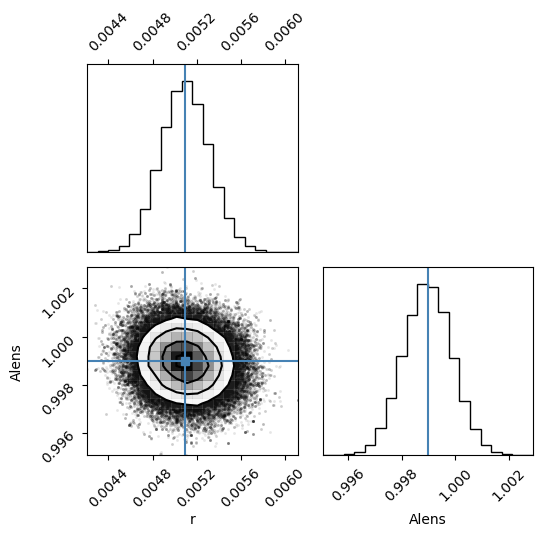

In [18]:
r_min = 0
r_max = 1
Alens_min = 0
Alens_max = 2

r_mean = r0
r_sigma = 0.001
Alens_mean = Alens0
Alens_sigma = 0.001

def prior(p):
    r, Alens = p
    r_pdf = scipy.stats.norm.pdf(r, loc=r_mean, scale=r_sigma)
    Alens_pdf = scipy.stats.norm.pdf(Alens, loc=Alens_mean, scale=Alens_sigma)
    if r_min <= r <= r_max and Alens_min <= Alens <= Alens_max :
        return  r_pdf * Alens_pdf  
    else:
        return -np.inf 

def like(p, clLens):   # Likelihood
    r, Alens = p
    clTh = r * clTensor / r0 + Alens * clLens / Alens0 + Nl 
    sum_term = -(np.sum((2 * ls[2:] + 1) * ((clReconstruitBB[2:] / clTh[2:]) + np.log(clTh[2:]))))
    return sum_term

def prob(p, clLens):   # Posterior 
    lp = prior(p)
    if not np.isfinite(lp):
        return -np.inf
    return np.log(lp+1e-40)  + like(p, clLens)


Nwalker, Ndim =  200, 2
p0 = np.zeros((Nwalker, Ndim))
p0[:, 0] = np.random.uniform(r_min, r_max, size=Nwalker)
p0[:, 1] = np.random.uniform(Alens_min, Alens_max, size=Nwalker)

sampler = emcee.EnsembleSampler(Nwalker, Ndim, prob, args=(clLens,))
pos, prob, state = sampler.run_mcmc(p0, 500)

sampler.reset()
pos, prob, state = sampler.run_mcmc(pos, 1000)

optimal_r, optimal_Alens = np.median(sampler.flatchain, axis=0)

tmp = corner.corner(sampler.flatchain,top_ticks = True, labels=['r', 'Alens'], truths=[optimal_r, optimal_Alens], color = 'black')
plt.tight_layout()

optimal_r, optimal_Alens

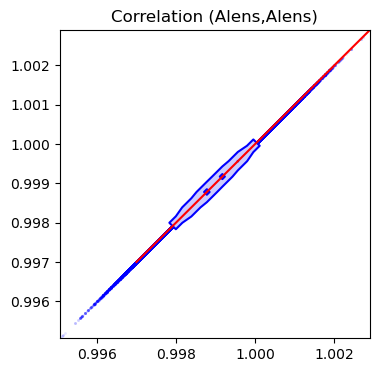

In [19]:
x = np.linspace(0.997,1.003,1000)
Alens_samples = sampler.flatchain[:, 1]
plt.figure(figsize = (4,4))

corner.hist2d(Alens_samples,Alens_samples, fill_contours = True, labels=['r', 'As'], truths=[optimal_r, optimal_Alens], color = 'blue')
y = x  
plt.plot(x,y, 'r')
plt.title('Correlation (Alens,Alens)')
plt.show()

Paramètre r:
Médiane: 0.005095734395107252
16e percentile: 0.0048800613272037335
84e percentile: 0.005313642316074825
Paramètre Alens:
Médiane: 0.9989681526441562
16e percentile: 0.9980660128707296
84e percentile: 0.9998645454833588


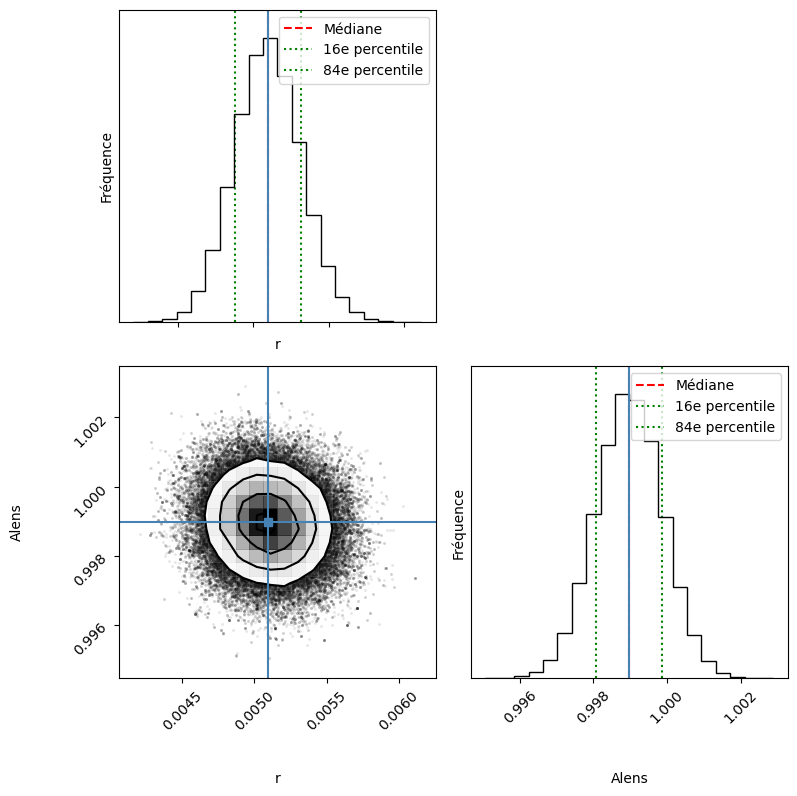

In [20]:
import matplotlib.pyplot as plt
import corner

# Récupérez les échantillons de la chaîne MCMC
samples = sampler.flatchain

# Calculez la médiane et les quantiles à 16e et 84e percentiles pour chaque paramètre
median_r = np.median(samples[:, 0])
median_Alens = np.median(samples[:, 1])
q16_r = np.percentile(samples[:, 0], 16)
q84_r = np.percentile(samples[:, 0], 84)
q16_Alens = np.percentile(samples[:, 1], 16)
q84_Alens = np.percentile(samples[:, 1], 84)

# Affichez les résultats
print("Paramètre r:")
print(f"Médiane: {median_r}")
print(f"16e percentile: {q16_r}")
print(f"84e percentile: {q84_r}")

print("Paramètre Alens:")
print(f"Médiane: {median_Alens}")
print(f"16e percentile: {q16_Alens}")
print(f"84e percentile: {q84_Alens}")

# Plot avec les barres d'erreur
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Tracez l'histogramme pour r
#axes[0, 0].hist(samples[:, 0], bins=30, color='b', alpha=0.7, label='Postérieur')
axes[0, 0].axvline(median_r, color='r', linestyle='--', label='Médiane')
axes[0, 0].axvline(q16_r, color='g', linestyle=':', label='16e percentile')
axes[0, 0].axvline(q84_r, color='g', linestyle=':', label='84e percentile')
axes[0, 0].set_xlabel('r')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].legend()

# Tracez l'histogramme pour Alens
#axes[1, 1].hist(samples[:, 1], bins=30, color='b', alpha=0.7, label='Postérieur')
axes[1, 1].axvline(median_Alens, color='r', linestyle='--', label='Médiane')
axes[1, 1].axvline(q16_Alens, color='g', linestyle=':', label='16e percentile')
axes[1, 1].axvline(q84_Alens, color='g', linestyle=':', label='84e percentile')
axes[1, 1].set_xlabel('Alens')
axes[1, 1].set_ylabel('Fréquence')
axes[1, 1].legend()

# Tracez le coin pour les deux paramètres
corner.corner(samples, labels=['r', 'Alens'], truths=[median_r, median_Alens], color='black', fig=fig)

plt.tight_layout()
plt.show()


In [21]:
from IPython.display import display, Math

In [22]:
percentiles_r = np.percentile(samples[:, 0], [16, 50, 84])
percentiles_Alens = np.percentile(samples[:, 1], [16, 50, 84])

q_r = np.diff(percentiles_r)
q_Alens = np.diff(percentiles_Alens)

labels = ['r', 'Alens']

txtr = "\\mathrm{{{0}}} = {1:.6f}_{{-{2:.6f}}}^{{{3:.6f}}}".format(labels[0], percentiles_r[1], q_r[0], q_r[1])
display(Math(txtr))

txtAlens = "\\mathrm{{{0}}} = {1:.6f}_{{-{2:.6f}}}^{{{3:.6f}}}".format(labels[1], percentiles_Alens[1], q_Alens[0], q_Alens[1])
display(Math(txtAlens))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Evolution when the noise level change
---------------

Noise level = 1e-10


<Figure size 400x400 with 0 Axes>

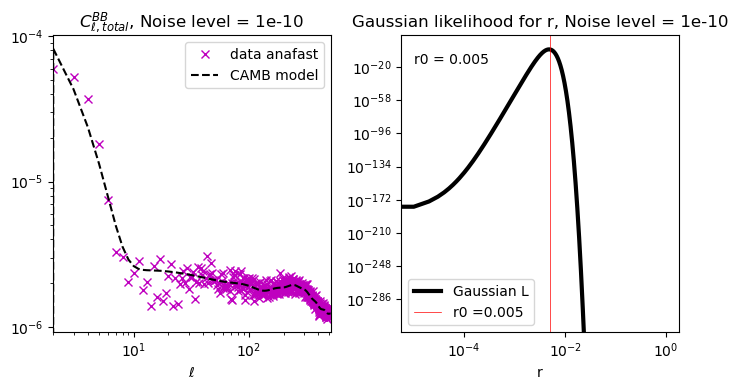

Noise level = 1e-09


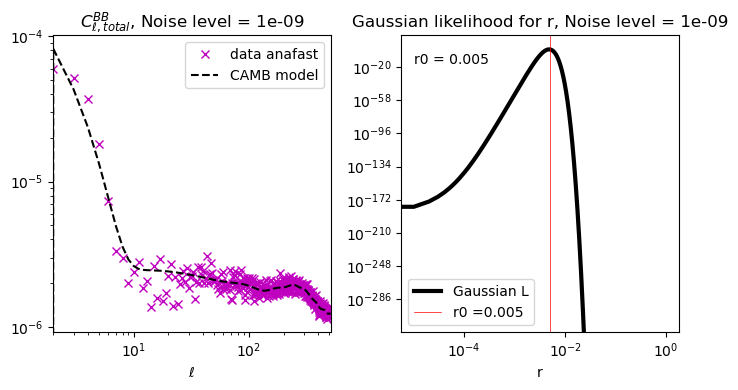

Noise level = 1e-08


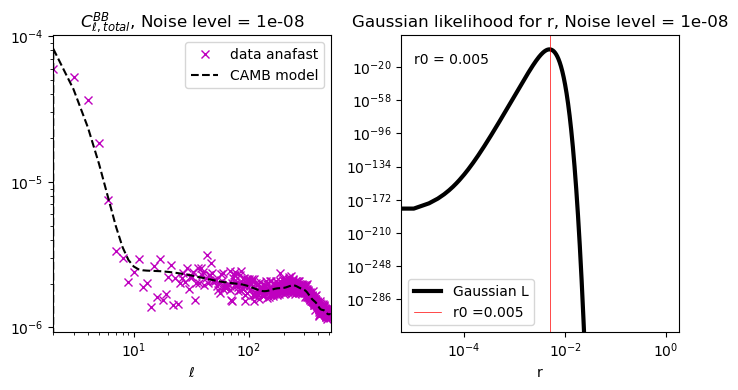

Noise level = 1e-07


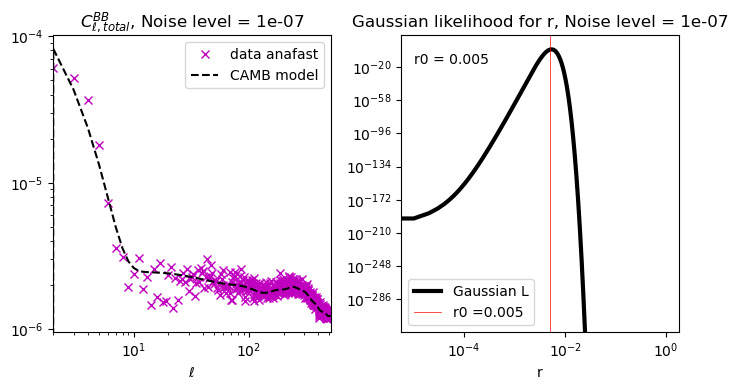

Noise level = 5.5e-07


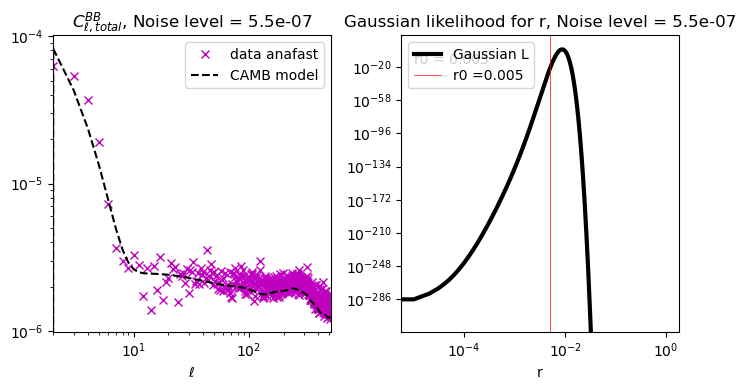

Noise level = 1e-06


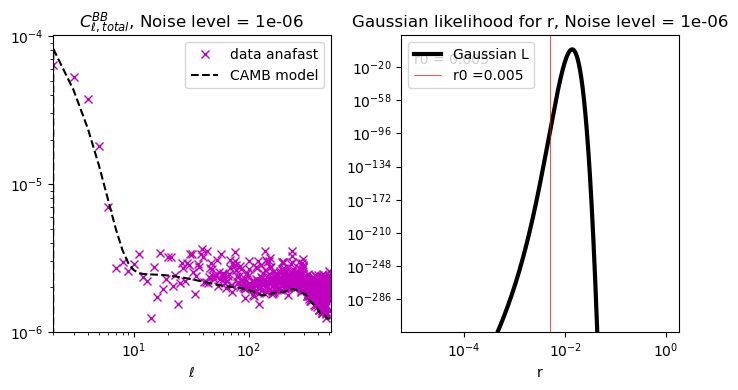

Noise level = 5.5e-06


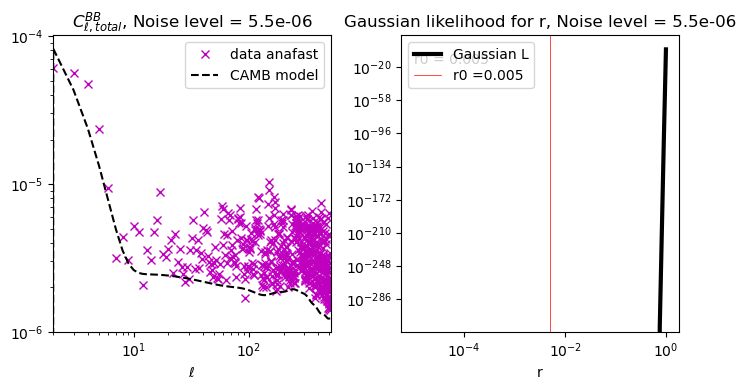

Noise level = 1e-05


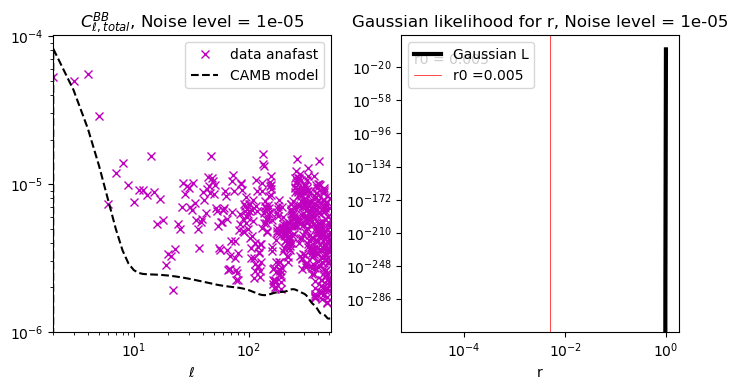

Noise level = 5.5e-05


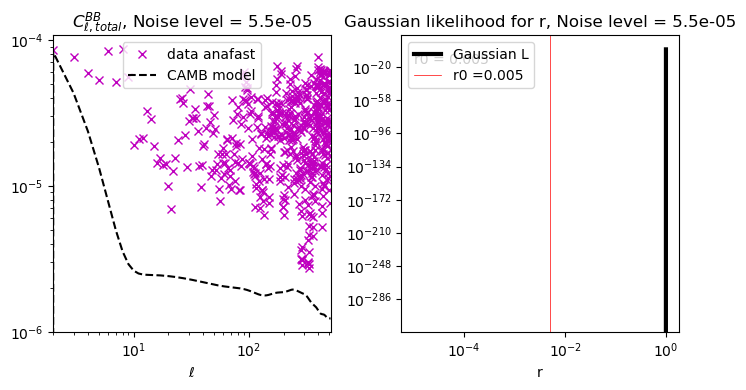

Noise level = 0.0001


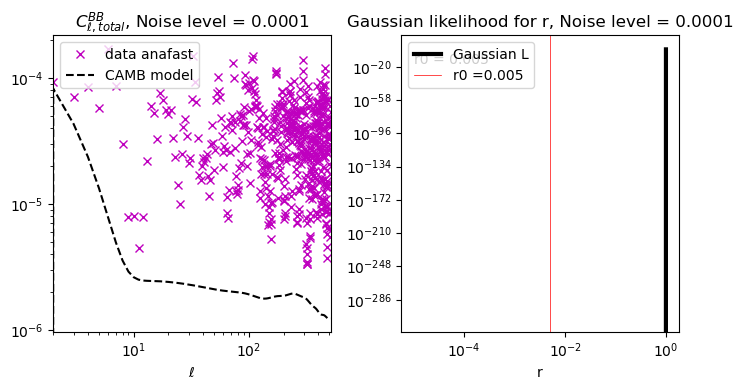

In [23]:
plt.figure(figsize=(4, 4))
noise_level = [1e-10,1e-9,1e-8,1e-7,5.5e-7,1e-6,5.5e-6,1e-5,5.5e-5,1e-4]
n_pix = hp.nside2npix(nside) 
maps = hp.synfast((clTT, clEE, clBB, clTE),
                  nside, new=True)
r_max = 1
r_min = 0
Alens_min = 0
Alens_max = 2

r_mean = r0
r_sigma = 0.001
Alens_mean = Alens0
Alens_sigma = 0.001


optimal_rrun = []
optimal_Alensrun = []
GaussianL = []

for i in noise_level : 
    noise = np.random.normal(loc=0, scale=i, size=n_pix)
    map_noise = hp.synfast(noise, nside)
    maps_with_noise = maps + map_noise
    cl_reconstruit = hp.anafast(maps_with_noise, lmax=lmax)
    Nl =  hp.anafast(noise, lmax = lmax)
    clReconstruitBB = cl_reconstruit[2]
   # plt.figure(figsize=(4, 4))
   # plt.loglog(ls, clReconstruitBB,'x', color='tomato', label='data anafast')
   # plt.loglog(ls, clBB  ,'--', label='CAMB model', color='black')
    #plt.savefig('AAAAclEvol-'+str(i)+'.pdf', dpi = 1000)
    #plt.xlim([2, lmax])
    #plt.title('$C_{\ell, total}^{BB}$')
    #plt.legend()
   # plt.xlabel('$\ell$')
    
    def prior(p):
        r, Alens = p
        r_pdf = scipy.stats.norm.pdf(r, loc=r_mean, scale=r_sigma)
        Alens_pdf = scipy.stats.norm.pdf(Alens, loc=Alens_mean, scale=Alens_sigma)
        if r_min <= r <= r_max and Alens_min <= Alens <= Alens_max :
            return  r_pdf * Alens_pdf  
        else:
            return -np.inf 

    def like(p, clLens):   # Likelihood
        r, Alens = p
        clTh = r * clTensor / r0 + Alens * clLens / Alens0 + Nl 
        sum_term = -(np.sum((2 * ls[2:] + 1) * ((clReconstruitBB[2:] / clTh[2:]) + np.log(clTh[2:]))))
        return sum_term

    def prob(p, clLens):   # Posterior 
        lp = prior(p)
        if not np.isfinite(lp):
            return -np.inf
        return np.log(lp+1e-40)  + like(p, clLens)

    fig, axes = plt.subplots(1, 2, figsize=(7, 4)) 
    
    print('Noise level = '+str(i))
    
    axes[0].loglog(ls, clReconstruitBB,'x', color='m', label='data anafast')
    axes[0].loglog(ls, clBB  ,'--', label='CAMB model', color='black')
    axes[0].set_xlim([2, lmax])
    axes[0].set_title('$C_{\ell, total}^{BB}$, Noise level = '+str(i))
    axes[0].legend()
    axes[0].set_xlabel('$\ell$')
    
    
    Nwalker, Ndim =  50, 2
    p0 = np.zeros((Nwalker, Ndim))
    p0[:, 0] = np.random.uniform(r_min, r_max, size=Nwalker)
    p0[:, 1] = np.random.uniform(Alens_min, Alens_max, size=Nwalker)

    sampler = emcee.EnsembleSampler(Nwalker, Ndim, prob, args=(clLens,))
    pos, prob, state = sampler.run_mcmc(p0, 500)

    sampler.reset()
    pos, prob, state = sampler.run_mcmc(pos, 1000)

    optimal_r, optimal_Alens = np.median(sampler.flatchain, axis=0)
    optimal_rrun.append(optimal_r)
    optimal_Alensrun.append(optimal_Alens)
    
    rr = np.linspace(0, 1, 100000)
    num_likelihoods = 1
    SOLgauss = []
    for _ in range(num_likelihoods):
        for j in rr:
            clTh = clTensor * j / r0 + Nl + clLens 
            somme =  np.sum((2*ls[2:]+1)*((clReconstruitBB[2:]/clTh[2:])+ np.log(clTh[2:])))
            SOLgauss.append(somme)
    SOLgauss = np.array(SOLgauss)
    fGauss = SOLgauss - np.min(SOLgauss)
    GaussianL.append(fGauss)
    axes[1].loglog(rr, np.exp(-fGauss/2), 'black',linewidth=3, label = 'Gaussian L')
    plt.xlabel('r')
    axes[1].set_xlabel('r')
    axes[1].set_title('Gaussian likelihood for r, Noise level = '+str(i))
    axes[1].text(1e-5, 1e-17, 'r0 = 0.005', color = 'black', fontsize = 10)
    #axes[1].axvline(x=optimal_r,color='black', linewidth=0.5, label = 'Optimal_r ='+str("%.5f" %optimal_r)) 
    axes[1].axvline(x=r0,color='red', linewidth=0.5, label = 'r0 ='+str(r0)) 
    axes[1].legend()

    r_samples = sampler.flatchain[:, 0]
    Alens_samples = sampler.flatchain[:, 1]

    plt.tight_layout()
    plt.show()
optimal_rrun = np.array(optimal_rrun)
optimal_Alensrun = np.array(optimal_Alensrun)
GaussianL = np.array(GaussianL) 

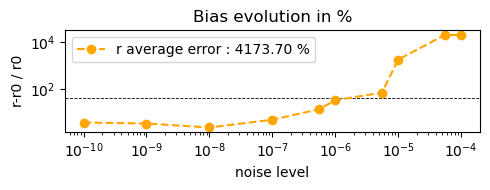

In [31]:
plt.figure(figsize = (5,2))

rbiais = (optimal_rrun - r0) / [r0]
plt.axhline(y=np.mean(np.abs(rbiais)), color='black', linestyle='--', linewidth = 0.6)
plt.loglog(noise_level, 100 * np.abs(rbiais), 'o--', color = 'orange', label = 'r average error : ' +str("%.2f" % np.mean(np.abs(100*rbiais))) + ' %')  
plt.title('Bias evolution in %')
plt.xlabel('noise level')
plt.ylabel('r-r0 / r0')
plt.legend()
plt.tight_layout()
#plt.savefig('rbiasEvol.pdf', dpi = 1000)

plt.show()

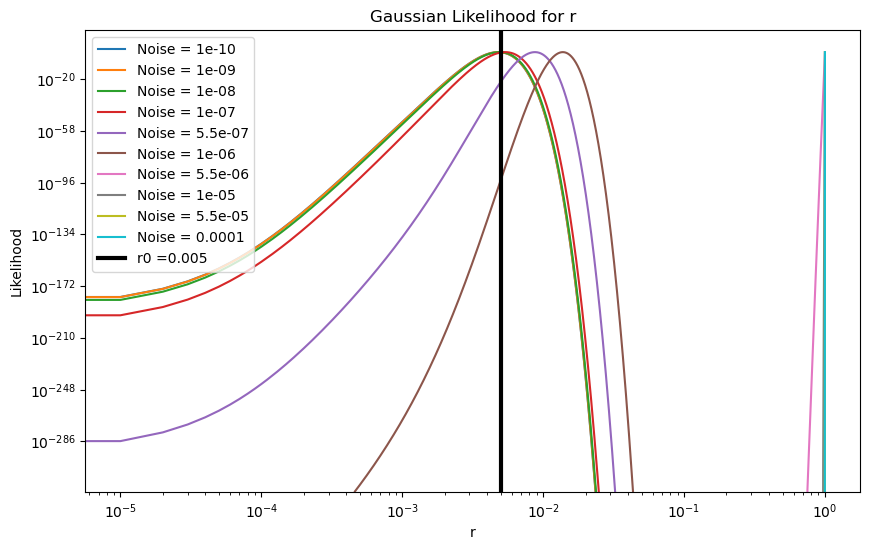

In [33]:
plt.figure(figsize=(10, 6))

for i, fGauss_i in enumerate(GaussianL):
    label = 'Noise = ' + str(noise_level[i])
    plt.loglog(rr, np.exp(-fGauss_i/2), label=label)

plt.xlabel('r')
plt.ylabel('Likelihood')
plt.axvline(x=r0,color='black', linewidth=3, label = 'r0 ='+str(r0)) 
plt.title('Gaussian Likelihood for r')
plt.legend()

plt.show()

Part II : Cut Sky regime
-------------------------
--------------------------------------------
--------------------------------------------

Mask definition 
----------------

calculation of a circular mask and estimation of the corresponding fsky 

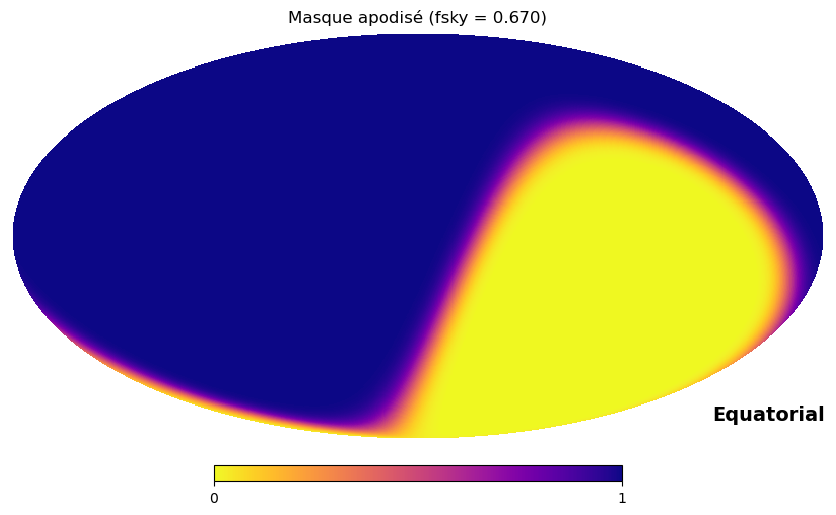

In [55]:
aposcale = 5
mask_radius = 1 # in radian

lon, lat = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)))
mask_center_lon, mask_center_lat = 0, 0

mask_indices = hp.query_disc(nside, hp.ang2vec(mask_center_lon, mask_center_lat, lonlat=True), mask_radius)

mask = np.ones(hp.nside2npix(nside))
mask[mask_indices] = 0

# Apodization
mask = nmt.mask_apodization(mask, aposcale, apotype="Smooth")

# fsky c
fsky = np.sum(mask) / hp.nside2npix(nside)

hp.mollview(mask, coord=['G', 'C'], title=f'Masque apodisé (fsky = {fsky:.3f})', cmap='plasma_r')
#plt.savefig('AAmask_apo.pdf', dpi = 1000)

Calculation of spin fields 0 and 2 and use of the NaMaster library to calculate coupling matrices between the various modes 
----------------

In [56]:
noise = np.random.normal(loc=0, scale=1e-10, size=n_pix)
map_noise = hp.synfast(noise, nside)
maps_with_noise = maps + map_noise

f0 = nmt.NmtField(mask, [maps_with_noise[0]])   # spin 0 field

f2 = nmt.NmtField(mask, [maps_with_noise[1], maps_with_noise[2]],  purify_b= True )  # spin 2 field 

nlb = 30   # Number of multipole per bins
b = nmt.NmtBin(nside, nlb = nlb, lmax = lmax)

In [57]:
cl_00 = nmt.compute_full_master(f0,f0,b)

cl_02 = nmt.compute_full_master(f0,f2,b)

cl_22 = nmt.compute_full_master(f2,f2,b)

ell_arr = b.get_effective_ells()

Plot of $C_\ell^{BB}$ reconstructed in cut sky 
----------------

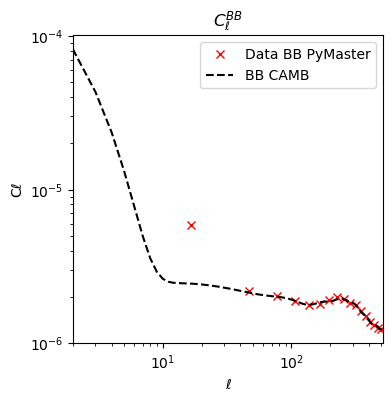

In [58]:
clBB_Nmt = cl_22[3] 
plt.figure(figsize = (4,4))
plt.loglog(ell_arr, clBB_Nmt, 'x',color = 'red',label = 'Data BB PyMaster', linewidth = 10)
plt.loglog(ls[2:], clBB[2:],'--',color = 'black', label = 'BB CAMB')
plt.xlim([2,lmax])
plt.xlabel('ℓ')
plt.ylabel('Cℓ')
plt.title('$C_{\ell}^{BB}$')
plt.legend()

delta_ell = nlb

Estimation of 2 cosmological parameters (r and Alens) using the MCMC (Markov Chains Monte Carlo) method with gaussian likelihood in cut sky
--------------------------

(We don't sum over the $\ell$ but now we sum over the bins: $\sum_{l}$ f(l) --> $\delta_{l}$ $\sum_{bin} f(bin$ )
-------------

(0.003973036538886873, 1.0003931625803415)

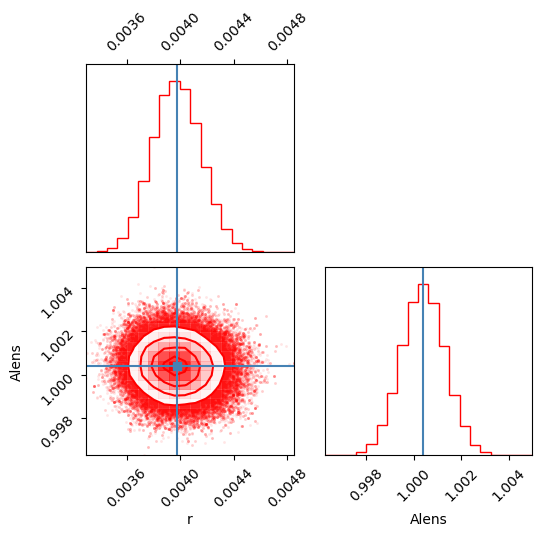

In [59]:
r_min = 0
r_max = 1
Alens_min = 0
Alens_max = 2

r_mean = r0
r_sigma = 0.001
Alens_mean = Alens0
Alens_sigma = 0.001

def prior(p):
    r, Alens = p
    r_pdf = scipy.stats.norm.pdf(r, loc=r_mean, scale=r_sigma)
    Alens_pdf = scipy.stats.norm.pdf(Alens, loc=Alens_mean, scale=Alens_sigma)
    if r_min <= r <= r_max and Alens_min <= Alens <= Alens_max:
        return  r_pdf * Alens_pdf 
    else:
        return -np.inf 
    
def like(p, clLens):
    r, Alens = p
    clTh = r * clTensor / r0 + Alens * clLens / Alens0 + Nl
    
    clTh_binned = b.bin_cell(clTh)
    ell_binned = b.get_effective_ells()
    
    sum_term = -fsky * delta_ell * np.sum((2 * ell_binned + 1) * ((clBB_Nmt / clTh_binned) + np.log(clTh_binned)))
    return sum_term



def prob(p, clLens):   # Posterior 
    lp = prior(p)
    if not np.isfinite(lp):
        return -np.inf
    return np.log(lp+1e-40)  + like(p, clLens)


Nwalker, Ndim =  200, 2
p0 = np.zeros((Nwalker, Ndim))
p0[:, 0] = np.random.uniform(r_min, r_max, size=Nwalker)
p0[:, 1] = np.random.uniform(Alens_min, Alens_max, size=Nwalker)

samplere = emcee.EnsembleSampler(Nwalker, Ndim, prob, args=(clLens,))
pos, prob, state = samplere.run_mcmc(p0, 500)

samplere.reset()
pos, prob, state = samplere.run_mcmc(pos, 1000)

optimal_rMasked, optimal_AlensMasked = np.median(samplere.flatchain, axis=0)

tmp = corner.corner(samplere.flatchain,top_ticks = True, labels=['r', 'Alens'], truths=[optimal_rMasked, optimal_AlensMasked], color = 'red')
plt.tight_layout()

optimal_rMasked, optimal_AlensMasked

Paramètre r:
Médiane: 0.003973036538886873
16e percentile: 0.0037948321263636753
84e percentile: 0.004155952314034733
Paramètre Alens:
Médiane: 1.0003931625803415
16e percentile: 0.9994696732795953
84e percentile: 1.0013047331328568


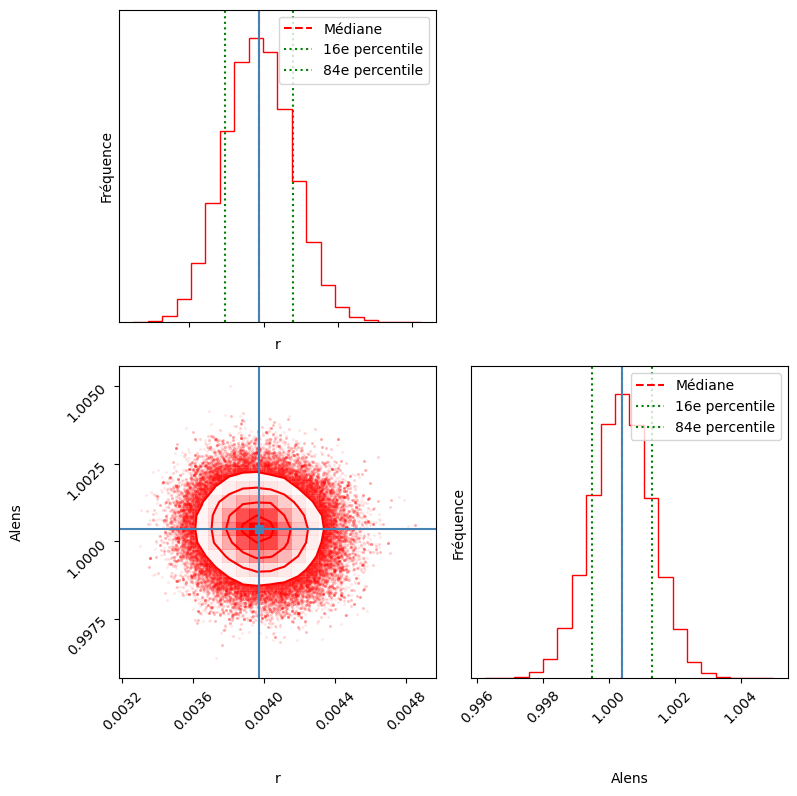

In [60]:
import corner

sampless = samplere.flatchain

median_r = np.median(sampless[:, 0])
median_Alens = np.median(sampless[:, 1])
q16_r = np.percentile(sampless[:, 0], 16)
q84_r = np.percentile(sampless[:, 0], 84)
q16_Alens = np.percentile(sampless[:, 1], 16)
q84_Alens = np.percentile(sampless[:, 1], 84)

print("Paramètre r:")
print(f"Médiane: {median_r}")
print(f"16e percentile: {q16_r}")
print(f"84e percentile: {q84_r}")

print("Paramètre Alens:")
print(f"Médiane: {median_Alens}")
print(f"16e percentile: {q16_Alens}")
print(f"84e percentile: {q84_Alens}")

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

axes[0, 0].axvline(median_r, color='r', linestyle='--', label='Médiane')
axes[0, 0].axvline(q16_r, color='g', linestyle=':', label='16e percentile')
axes[0, 0].axvline(q84_r, color='g', linestyle=':', label='84e percentile')
axes[0, 0].set_xlabel('r')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].legend()

axes[1, 1].axvline(median_Alens, color='r', linestyle='--', label='Médiane')
axes[1, 1].axvline(q16_Alens, color='g', linestyle=':', label='16e percentile')
axes[1, 1].axvline(q84_Alens, color='g', linestyle=':', label='84e percentile')
axes[1, 1].set_xlabel('Alens')
axes[1, 1].set_ylabel('Fréquence')
axes[1, 1].legend()

corner.corner(sampless, labels=['r', 'Alens'], truths=[median_r, median_Alens], color='red', fig=fig)

plt.tight_layout()
plt.show()

In [61]:
percentiles_rr = np.percentile(sampless[:, 0], [16, 50, 84])
percentiles_Alenss = np.percentile(sampless[:, 1], [16, 50, 84])

# Calculez les incertitudes
q_rr = np.diff(percentiles_rr)
q_Alenss = np.diff(percentiles_Alenss)

labels = ['r', 'Alens']

txtrr = "\\mathrm{{{0}}} = {1:.6f}_{{-{2:.6f}}}^{{{3:.6f}}}".format(labels[0], percentiles_rr[1], q_rr[0], q_rr[1])
display(Math(txtrr))
txtAlenss = "\\mathrm{{{0}}} = {1:.6f}_{{-{2:.6f}}}^{{{3:.6f}}}".format(labels[1], percentiles_Alenss[1], q_Alenss[0], q_Alenss[1])
display(Math(txtAlenss))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Evolution of estimates when fsky changes : 
-----------------------------

In [68]:
mask_radius = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]

optimal_rrun = []
optimal_Alensrun = []
fsky_list = []

for i in mask_radius : 
    lon, lat = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)))
    mask_center_lon, mask_center_lat = 0, 0
    mask_indices = hp.query_disc(nside, hp.ang2vec(mask_center_lon, mask_center_lat, lonlat=True), i)
    mask = np.ones(hp.nside2npix(nside))
    mask[mask_indices] = 0
    mask = nmt.mask_apodization(mask, aposcale, apotype="Smooth")
    fsky = np.sum(mask) / hp.nside2npix(nside)
    fsky_list.append(fsky)
    f0 = nmt.NmtField(mask, [maps_with_noise[0]])   # champ spin 0
    f2 = nmt.NmtField(mask, [maps_with_noise[1], maps_with_noise[2]],  purify_b= True )  # champ spin 2 
    nlb = 30
    b = nmt.NmtBin(nside, nlb = nlb, lmax = lmax)
    cl_00 = nmt.compute_full_master(f0,f0,b)
    cl_02 = nmt.compute_full_master(f0,f2,b)
    cl_22 = nmt.compute_full_master(f2,f2,b)
    clBB_Nmt = cl_22[3] 
    r_min = 0
    r_max = 1
    Alens_min = 0
    Alens_max = 2
    r_mean = r0
    r_sigma = 0.001
    Alens_mean = Alens0
    Alens_sigma = 0.001
    def prior(p):
        r, Alens = p
        r_pdf = scipy.stats.norm.pdf(r, loc=r_mean, scale=r_sigma)
        Alens_pdf = scipy.stats.norm.pdf(Alens, loc=Alens_mean, scale=Alens_sigma)
        if r_min <= r <= r_max and Alens_min <= Alens <= Alens_max:
            return  r_pdf * Alens_pdf 
        else:
            return -np.inf 
    def like(p, clLens):
        r, Alens = p
        clTh = r * clTensor / r0 + Alens * clLens / Alens0 + Nl
        clTh_binned = b.bin_cell(clTh)
        ell_binned = b.get_effective_ells()
        sum_term = -fsky * delta_ell * np.sum((2 * ell_binned + 1) * ((clBB_Nmt / clTh_binned) + np.log(clTh_binned)))
        return sum_term

    def prob(p, clLens):   # Posterior 
        lp = prior(p)
        if not np.isfinite(lp):
            return -np.inf
        return np.log(lp+1e-40)  + like(p, clLens)
  
    Nwalker, Ndim =  100, 2
    p0 = np.zeros((Nwalker, Ndim))
    p0[:, 0] = np.random.uniform(r_min, r_max, size=Nwalker)
    p0[:, 1] = np.random.uniform(Alens_min, Alens_max, size=Nwalker)
    sampler = emcee.EnsembleSampler(Nwalker, Ndim, prob, args=(clLens,))
    pos, prob, state = sampler.run_mcmc(p0, 500)
    sampler.reset()
    pos, prob, state = sampler.run_mcmc(pos, 1000)
    optimal_rMasked, optimal_AlensMasked = np.median(sampler.flatchain, axis=0)
    optimal_rrun.append(optimal_rMasked)
    optimal_Alensrun.append(optimal_AlensMasked)
    print('r estimation :'+str(optimal_rMasked), 'error r-r0:'+str(optimal_rMasked-r0), 'Alens estimation :'+str(optimal_AlensMasked), 'error Alens-Alens0:'+str(optimal_AlensMasked-Alens0))
    sampless = samplere.flatchain
    median_r = np.median(sampless[:, 0])
    median_Alens = np.median(sampless[:, 1])
    q16_r = np.percentile(sampless[:, 0], 16)
    q84_r = np.percentile(sampless[:, 0], 84)
    q16_Alens = np.percentile(sampless[:, 1], 16)
    q84_Alens = np.percentile(sampless[:, 1], 84)
    #print("Paramètre r:")
    #print(f"Médiane: {median_r}")
    #print(f"16e percentile: {q16_r}")
    #print(f"84e percentile: {q84_r}")
    #print("Paramètre Alens:")
    #print(f"Médiane: {median_Alens}")
    #print(f"16e percentile: {q16_Alens}")
    #print(f"84e percentile: {q84_Alens}")
    #fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    #axes[0, 0].hist(samples[:, 0], bins=30, color='b', alpha=0.7, label='Postérieur')
    #axes[0, 0].axvline(median_r, color='r', linestyle='--', label='Médiane')
    #axes[0, 0].axvline(q16_r, color='g', linestyle=':', label='16e percentile')
    #axes[0, 0].axvline(q84_r, color='g', linestyle=':', label='84e percentile')
   # axes[0, 0].set_xlabel('r')
    #axes[0, 0].set_ylabel('Fréquence')
    #axes[0, 0].legend()
    #axes[1, 1].hist(samples[:, 1], bins=30, color='b', alpha=0.7, label='Postérieur')
    #axes[1, 1].axvline(median_Alens, color='r', linestyle='--', label='Médiane')
    #axes[1, 1].axvline(q16_Alens, color='g', linestyle=':', label='16e percentile')
    #axes[1, 1].axvline(q84_Alens, color='g', linestyle=':', label='84e percentile')
    #axes[1, 1].set_xlabel('Alens')
    #axes[1, 1].set_ylabel('Fréquence')
    #axes[1, 1].legend()
    #corner.corner(sampless, labels=['r', 'Alens'], truths=[median_r, median_Alens], color='red', fig=fig)
   # plt.tight_layout()
    #plt.show()
    
    
optimal_rrun = np.array(optimal_rrun)
optimal_Alensrun = np.array(optimal_Alensrun) 
fsky_list = np.array(fsky_list)

r estimation :0.005677486847223981 error r-r0:0.0006774868472239808 Alens estimation :1.0000950320743471 error Alens-Alens0:9.503207434713445e-05
r estimation :0.005474485131576341 error r-r0:0.00047448513157634115 Alens estimation :1.0000570295573048 error Alens-Alens0:5.702955730479964e-05
r estimation :0.005365966409559882 error r-r0:0.0003659664095598822 Alens estimation :1.000109111160738 error Alens-Alens0:0.00010911116073808458
r estimation :0.004805684828339695 error r-r0:-0.00019431517166030535 Alens estimation :1.0002535927642313 error Alens-Alens0:0.00025359276423131405
r estimation :0.0043850913264815465 error r-r0:-0.0006149086735184536 Alens estimation :1.0002740233057321 error Alens-Alens0:0.0002740233057321184
r estimation :0.00480519876347421 error r-r0:-0.00019480123652578993 Alens estimation :1.0001053447123076 error Alens-Alens0:0.000105344712307609
r estimation :0.00531390034312344 error r-r0:0.00031390034312344 Alens estimation :0.999900659954337 error Alens-Alens

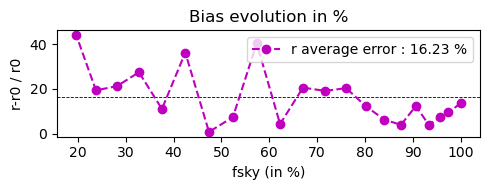

In [69]:
plt.figure(figsize = (5,2))

rbias = (optimal_rrun - r0) / [r0]
plt.axhline(y=100 * np.mean(np.abs(rbias)), color='black', linestyle='--', linewidth = 0.6)
plt.plot(100 * fsky_list, 100 * np.abs(rbias), 'o--', color = 'm', label = 'r average error : ' +str("%.2f" % np.mean(np.abs(100*rbias))) + ' %')  
plt.title('Bias evolution in %')
plt.xlabel('fsky (in %)')
plt.ylabel('r-r0 / r0')
plt.legend()
plt.tight_layout()
#plt.savefig('rbiasEvol.pdf', dpi = 1000)

plt.show()

Hamimeche & Lewis Likelihood : 
----------------------------

In full sky : 
----------

In full sky, Hamimeche & Lewis likelihood and Exact likelihood are written in the same way :

$$-2 \log(L) \approx \sum_{l} (2l+1)[C_{l}^{-1} D_{l} - ln(C_{l}^{-1} D_{l}) -1] \approx \chi^{2}$$


They are identical

Comparison between Gaussian likelihood and Hamimeche likelihood : 
---------------------------------------------------------------------

In [ ]:
def hl_compute_offsets(ell, varcl, clref, fsky=fsky, iter=100):
    Nl = np.sqrt(np.abs(varcl - (2.0 / (2.0 * ell + 1) * clref ** 2) / fsky))
    for i in range(iter):
        Nl = np.sqrt(np.abs(varcl - 2.0 / (2.0 * ell + 1) / fsky * (clref ** 2 + 2.0 * Nl * clref)))
    return Nl * np.sqrt((2.0 * ell + 1) / 2.0)


def hl_ghl(x): 
    return np.sign(x - 1) * np.sqrt(2.0 * (x - np.log(x) - 1)) 

def hamimeche(p, clLens):
        r, Alens = p
        model = r * clTensor / r0 + Alens * clLens / Alens0 + Nl
        model_binned = b.bin_cell(model)
        clfid = b.bin_cell(clBB)
        cov = model_binned * np.identity(len(clfid))
        voc = np.linalg.inv(cov)
        ell_binned = b.get_effective_ells()
        cloff = hl_compute_offsets(ell_binned, np.diag(cov), b.bin_cell(model), fsky=fsky)
        x = (clBB_Nmt) / (model_binned)
        g = np.sign(x) * hl_ghl(np.abs(x))
        X = (np.sqrt(clfid + cloff)) * g * (np.sqrt(clfid + cloff))
        return - X.T @ voc @ X

To be continued...
-------------------